In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
import mplhep as hep
%matplotlib inline
hep.style.use("CMS")


def distance(m):
    return 10**(m/5+1)

alpha_per_dist = distance(6.214)
NGC_188_dist = distance (11.490)
NGC_6774_dist = distance (7.455)
Praesepe_dist = distance(6.350)

print(alpha_per_dist, NGC_188_dist, NGC_6774_dist, Praesepe_dist)

def parallax(d):
    return 1/d

alpha_per_parallax = parallax(distance(6.214))
NGC_188_parallax = parallax(distance (11.490))
NGC_6774_parallax = parallax(distance (7.455))
Praesepe_parallax = parallax(distance(6.350))

print(alpha_per_parallax, NGC_188_parallax, NGC_6774_parallax, Praesepe_parallax)

174.90410399663034 1986.0949173573717 309.7419299216581 186.20871366628674
0.005717418729175536 0.0005035006087879047 0.003228494121712635 0.005370317963702528


# ALPHA-PER

In [2]:
query_result1 = pd.read_csv('alpha-per.csv')
query_result1

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,lum_val
0,249002004596065280,54.273290,0.134179,47.859650,0.087983,6.820399,0.176558,38.629738,-57.623747,-137.139426,17.987490,3.177172,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1,249016057728732672,54.502581,0.086220,48.233474,0.059298,5.450689,0.107075,50.905437,62.522056,-44.984175,17.244448,2.855265,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
2,249016538765079936,54.437132,0.027663,48.241657,0.019518,6.220772,0.034707,179.238160,-46.658461,-3.112474,11.929754,1.197093,-52.897385,0.619900,NOT_AVAILABLE,4897.6000,NaN,0.367793
3,249044331494743296,53.668314,0.029319,48.006122,0.022145,5.514268,0.038492,143.255810,21.712035,-25.450221,12.509609,1.203662,1.238212,1.136724,NOT_AVAILABLE,4894.0776,0.0570,0.274633
4,249033787353638912,54.368295,0.087633,48.455774,0.059450,5.184261,0.111492,46.498960,21.450535,-24.761738,17.139517,3.160747,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,442041096421343872,53.462130,0.051831,50.791813,0.043998,6.237736,0.074795,83.397680,16.915209,-44.903587,16.212198,2.748966,NaN,NaN,NOT_AVAILABLE,4065.5500,0.5660,NaN
5355,442104657639507456,55.267622,0.410714,51.309757,0.275212,4.560785,0.483914,9.424783,-2.485399,-5.031334,19.040840,2.378822,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
5356,442043879560151424,53.289493,0.020417,50.845153,0.016357,6.006943,0.027244,220.483150,21.628167,-20.974319,14.429325,2.018854,NaN,NaN,NOT_AVAILABLE,4046.1000,0.3817,NaN
5357,442140567863410560,54.242367,0.028739,51.217607,0.019855,6.949948,0.035653,194.932480,30.500466,-11.289686,11.141035,1.009890,10.214935,0.593962,NOT_AVAILABLE,5196.0000,0.1090,0.573390


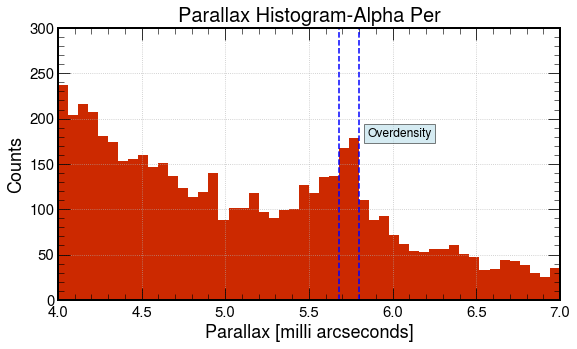

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [30]:
def parallax_overdensity(x,bins,color,x1,x2,y1,y2,xlabel,ylabel,title,t1,t2,line1,line2):
    plt.figure(figsize=(9,5))
    plt.hist(x, bins=bins, color=color)
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    plt.xlabel(xlabel, fontsize=18, loc="center")
    plt.ylabel(ylabel, fontsize=18, loc="center")
    plt.title(title, fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.text(t1,t2,'Overdensity', fontsize = 12, bbox = dict(boxstyle = 'square', facecolor = 'lightblue', alpha = 0.5))
    plt.axvline(x = line1, color = 'b', linestyle='--')
    plt.axvline(x = line2, color = 'b', linestyle='--')
    plt.grid()
    plt.show()
    return plt

#RA vs DEC without constraints
def scatterRADEC(f1,f2,x,y,s,color,x1,x2,y1,y2,xlabel,ylabel,title):
    plt.figure(figsize=(f1,f2))
    plt.scatter(x, y, color=color, s=s)
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    plt.xlabel(xlabel, fontsize=18, loc="center")
    plt.ylabel(ylabel, fontsize=18, loc="center")
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.show()
    return plt

def scatter(f1,f2,x,y,s,color,x1,x2,y1,y2,xlabel,ylabel,title,v1,v2,h1,h2):
    plt.figure(figsize=(f1,f2))
    plt.scatter(x, y, color=color, s=s)
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    plt.xlabel(xlabel, fontsize=18, loc="center")
    plt.ylabel(ylabel, fontsize=18, loc="center")
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axvline(x = v1, color = 'b', linestyle='--', alpha=0.5)
    plt.axvline(x = v2, color = 'b', linestyle='--', alpha=0.5)
    plt.axhline(y = h1, color = 'red', linestyle='--', alpha=0.5)
    plt.axhline(y = h2, color = 'red', linestyle='--', alpha=0.5)
    plt.grid()
    plt.show()
    return plt


#RA vs DEC without constraints
def scatter2(f1,f2,x,y,s,color,x_,y_,color_,x1,x2,y1,y2,xl,yl,title):
    plt.figure(figsize=(f1,f2))
    plt.scatter(x, y, color=color, s=s)
    plt.scatter(x_, y_, color=color_, s=s)
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    plt.xlabel(xl, fontsize=18, loc="center")
    plt.ylabel(yl, fontsize=18, loc="center")
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.show()
    return plt

   
#Filter parallax and plot
query_result1_filtered = query_result1.dropna(subset=['parallax'])
parallax1 = query_result1_filtered['parallax']

parallax_overdensity(parallax1,50,'#cc2900',4,7,0,300,"Parallax [milli arcseconds]","Counts",
                     "Parallax Histogram-Alpha Per",5.85,180,5.68,5.8)

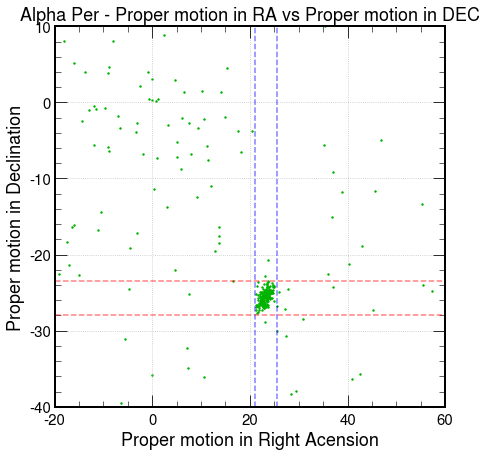

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [31]:
#proper motion

pmra_ = []
pmdec_ = []
g_mean_mag = []
bp_rp = []
parallax_1=[]


for index, row in query_result1_filtered.iterrows():
    if row['parallax'] >= 5.68 and row['parallax'] <= 5.8:
        parallax_1.append(row['parallax'])
        pmra_.append(row['pmra'])
        pmdec_.append(row['pmdec'])
        bp_rp.append(row['bp_rp'])
        g_mean_mag.append(row['phot_g_mean_mag'])


scatter(7,7,pmra_,pmdec_,2,'#00b300',-20,60,-40,10,"Proper motion in Right Acension","Proper motion in Declination",
        "Alpha Per - Proper motion in RA vs Proper motion in DEC",21,25.5,-28,-23.5)

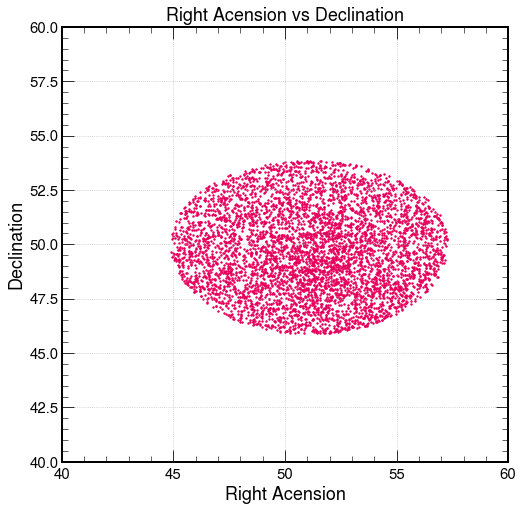

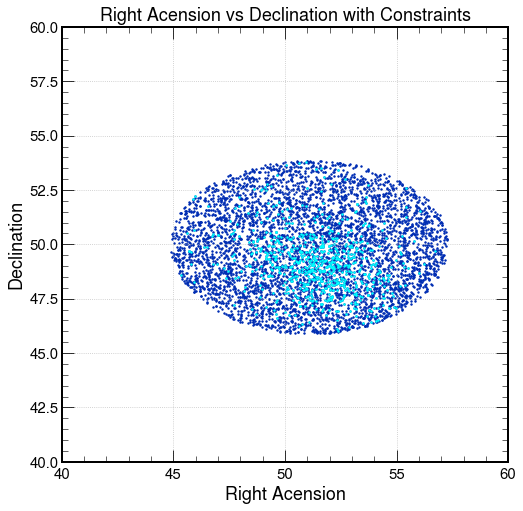

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [56]:
ra = query_result1['ra']
dec = query_result1['dec']

scatterRADEC(8,8,ra,dec,2,"#e6005c",40,60,40,60,"Right Acension","Declination","Right Acension vs Declination")

ra_=[]
dec_=[]

for index, row in query_result1_filtered.iterrows():
    if row['pmra'] >= 21 and row['pmra'] <= 25.5 and row['pmdec'] >= -28 and row['pmdec'] <= -23.4:
        ra_.append(row['ra'])
        dec_.append(row['dec'])

scatter2(8,8,ra,dec,2,"#002db3",ra_,dec_,"#00ffff",40,60,40,60,"Right Acension","Declination",
         "Right Acension vs Declination with Constraints")

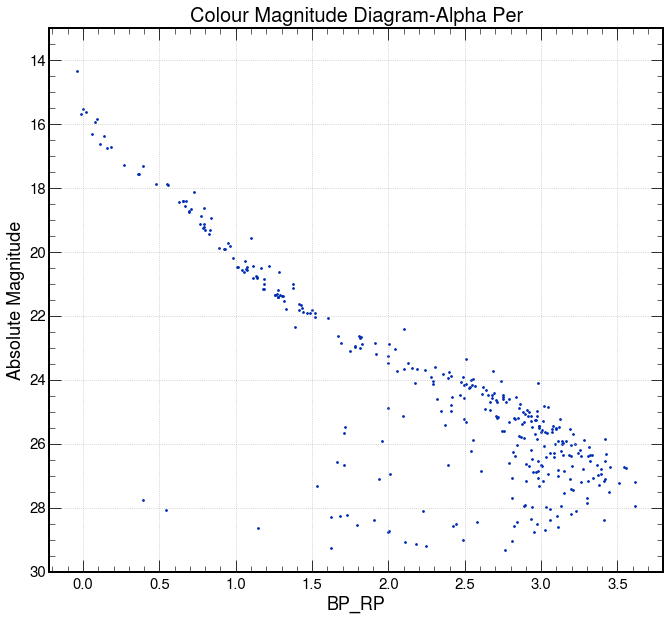

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [64]:
#Colour Magnitude Diagram
def cmd(parallax,g_magnitude,x,s,color,y1,y2,title,f1,f2):
    d = np.array([(1/i) for i in parallax])
    M_G = g_magnitude - 5*np.log10(d/10)
    plt.figure(figsize=(f1,f2))
    plt.scatter(x,M_G,s=s,color=color)
    plt.ylim(y1,y2)
    plt.xlabel("BP_RP", fontsize=18, loc="center")
    plt.ylabel("Absolute Magnitude", fontsize=18, loc="center")
    plt.title(title, fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.show()
    return plt

#parallax,g_magnitude,y,s,color,y1,y2,title
cmd(parallax_1,g_mean_mag,bp_rp,3,"#002db3",30,13,"Colour Magnitude Diagram-Alpha Per",10,9) 


# NGC 188

In [7]:
query_result2 = pd.read_csv('ngc_188.csv')
query_result2

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,lum_val
0,2300207707181124736,359.832248,0.057044,85.443151,0.050650,0.532360,0.062889,9.273588,-0.163135,16.959679,1.350010,NaN,NaN,NOT_AVAILABLE,4897.700,1.0370,0.488541
1,2300195509474015232,359.706482,0.032104,85.374579,0.034360,0.519469,0.040174,-9.131375,6.989935,15.874063,1.192877,NaN,NaN,NOT_AVAILABLE,4898.250,1.4000,1.394374
2,573333230135521536,16.646331,0.045187,84.362190,0.042099,0.596648,0.049799,0.336070,4.086049,16.530416,1.104425,NaN,NaN,NOT_AVAILABLE,4978.500,0.4420,0.566699
3,573324292306627840,13.422324,0.082682,84.351007,0.071405,0.534567,0.087963,0.445558,4.360513,17.753424,1.301354,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
4,573335600957750400,15.050258,0.039979,84.378999,0.036928,0.514174,0.041897,-3.496542,1.576068,16.284695,1.121006,NaN,NaN,NOT_AVAILABLE,4904.375,0.7735,0.973580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,574141474260582912,8.418458,0.071815,86.150447,0.067914,0.575982,0.073571,-0.571412,4.470879,17.186020,1.219583,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1443,574100483092707840,8.841700,0.061174,86.166917,0.054562,0.542756,0.063146,-3.419179,1.895768,16.846338,1.094717,NaN,NaN,NOT_AVAILABLE,5028.660,0.2713,0.506444
1444,574083711244929024,14.002857,0.094699,86.017629,0.063322,0.557333,0.088677,3.490821,-0.903053,17.417300,1.373201,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1445,574108420192531456,14.448992,0.021769,86.144560,0.015953,0.598988,0.021124,-4.376185,-1.544938,14.563945,0.797335,NaN,NaN,NOT_AVAILABLE,5878.000,NaN,3.083289


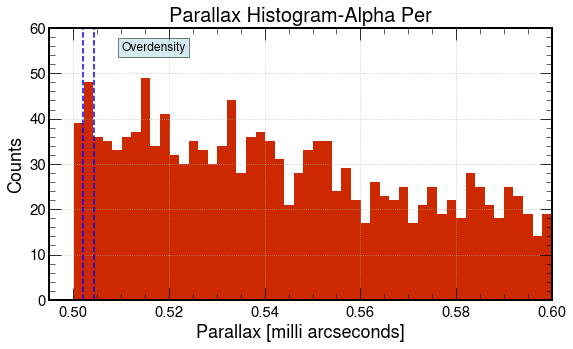

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [78]:
query_result2_filtered = query_result2.dropna(subset=['parallax'])
parallax2 = query_result2_filtered['parallax']

parallax_overdensity(parallax2,50,'#cc2900',0.495,0.6,0,60,"Parallax [milli arcseconds]","Counts",
                     "Parallax Histogram-Alpha Per",0.51,55,0.502,0.5043)

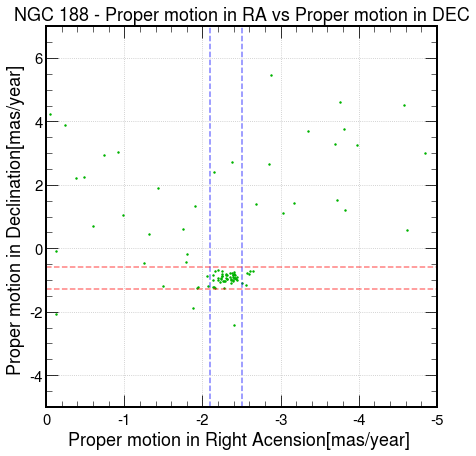

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [105]:
#proper motion
pmra_2 = []
pmdec_2 = []
g_mean_mag2 = []
bp_rp2 = []
parallax_2=[]


for index, row in query_result2_filtered.iterrows():
    if row['parallax'] >= 0.502 and row['parallax'] <= 0.51:
        parallax_2.append(row['parallax'])
        pmra_2.append(row['pmra'])
        pmdec_2.append(row['pmdec'])
        bp_rp2.append(row['bp_rp'])
        g_mean_mag2.append(row['phot_g_mean_mag'])


scatter(7,7,pmra_2,pmdec_2,2,'#00b300',0,-5,-5,7,"Proper motion in Right Acension[mas/year] ",
        "Proper motion in Declination[mas/year] ","NGC 188 - Proper motion in RA vs Proper motion in DEC",-2.1,-2.5,-1.3,-0.6)

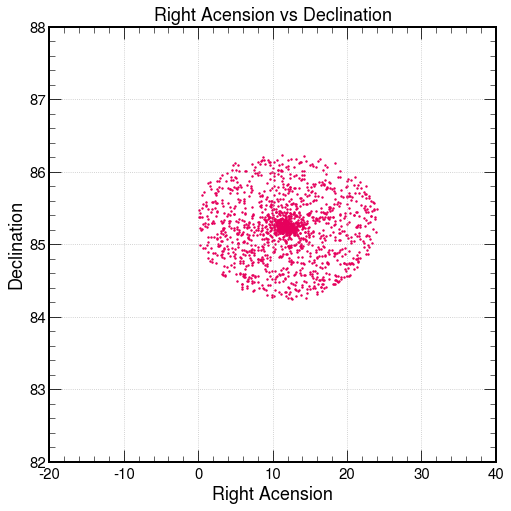

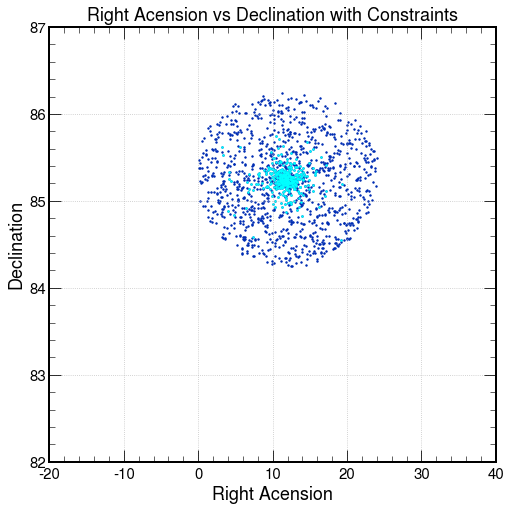

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [106]:
ra2 = query_result2['ra']
dec2 = query_result2['dec']

scatterRADEC(8,8,ra2,dec2,2,"#e6005c",-20,40,82,88,"Right Acension","Declination","Right Acension vs Declination")

ra_2=[]
dec_2=[]

for index, row in query_result2_filtered.iterrows():
    if row['pmra'] >= -2.5 and row['pmra'] <= -2.1 and row['pmdec'] >= -1.3 and row['pmdec'] <= -0.6:
        ra_2.append(row['ra'])
        dec_2.append(row['dec'])

# plt.scatter(ra_2,dec_2,color='black')
# #plt.xlim(-20,40)
# plt.show()

scatter2(8,8,ra2,dec2,2,"#002db3",ra_2,dec_2,"#00ffff",-20,40,82,87,"Right Acension","Declination",
         "Right Acension vs Declination with Constraints")

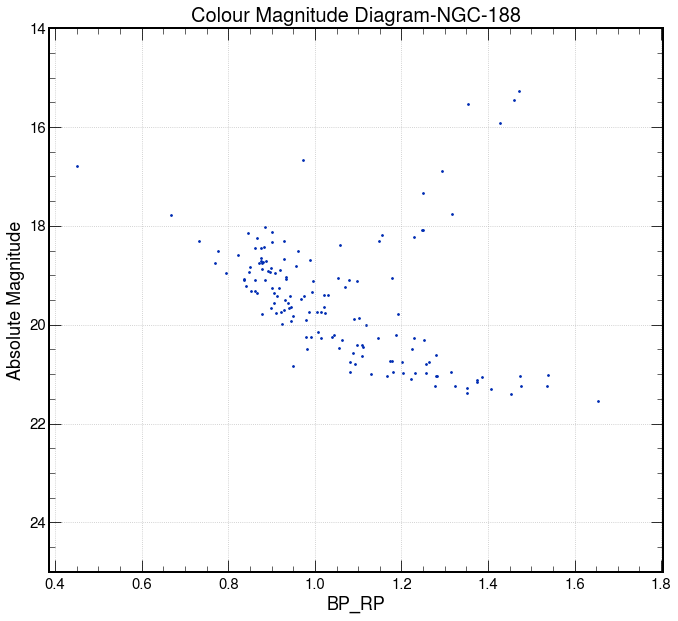

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [107]:
#parallax,g_magnitude,y,s,color,y1,y2,title
cmd(parallax_2,g_mean_mag2,bp_rp2,3,"#002db3",25,14,"Colour Magnitude Diagram-NGC-188",11,10) 

# NGC 6774

In [91]:
query_result3 = pd.read_csv('ngc_6774.csv')
query_result3

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
0,4183930644665708800,289.542970,0.395060,-16.266331,0.379962,2.645648,0.422661,-4.568994,-1.440806,19.472296,1.447531,NaN,NaN,NOT_AVAILABLE,NaN,NaN
1,4183878555312530816,289.642125,0.035564,-16.409011,0.036985,2.310461,0.044681,-16.504599,-30.463953,12.568622,0.994399,8.975413,2.701473,NOT_AVAILABLE,5337.00,0.828
2,4183909857034799744,290.108915,0.091183,-16.128440,0.073942,2.993225,0.086573,6.110367,-27.895045,12.709789,1.103258,-39.862361,7.762478,NOT_AVAILABLE,4960.71,0.671
3,4183939406410473984,289.223938,0.047463,-16.253479,0.047427,3.074112,0.060830,5.735919,-8.800959,15.925346,1.963001,NaN,NaN,NOT_AVAILABLE,4158.01,0.458
4,4183924386906759936,289.459973,0.133026,-16.430004,0.127516,3.344261,0.164789,-2.376187,2.010730,17.867040,2.774534,NaN,NaN,NOT_AVAILABLE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,4087646888166632192,288.514505,0.371927,-17.427073,0.336558,2.341537,0.392023,-7.256229,0.944565,18.825047,1.371111,NaN,NaN,NOT_AVAILABLE,NaN,NaN
2952,4087642902436668160,288.624173,0.187835,-17.486125,0.149611,2.076786,0.191156,-13.899552,-14.074655,18.123970,2.340122,NaN,NaN,NOT_AVAILABLE,NaN,NaN
2953,4087641528046760704,288.601205,0.255779,-17.541575,0.215648,2.833476,0.261459,9.205231,-23.983743,18.552435,2.571400,NaN,NaN,NOT_AVAILABLE,NaN,NaN
2954,4087640948237712896,288.454504,0.098664,-17.463234,0.072793,2.358243,0.098815,6.413211,-6.925375,16.399921,1.935921,NaN,NaN,NOT_AVAILABLE,3817.00,0.215


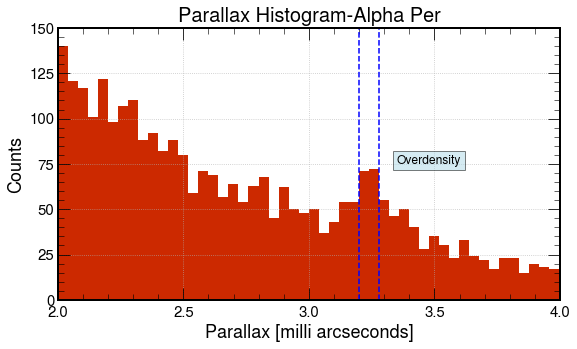

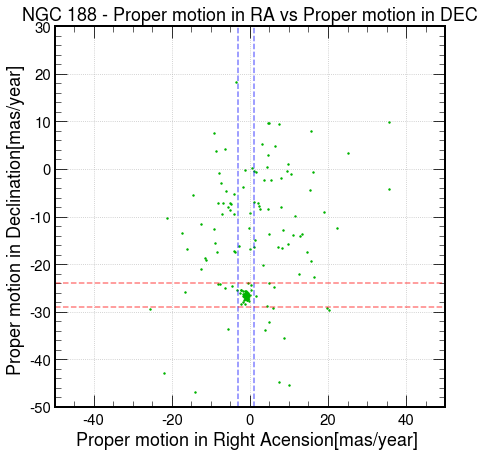

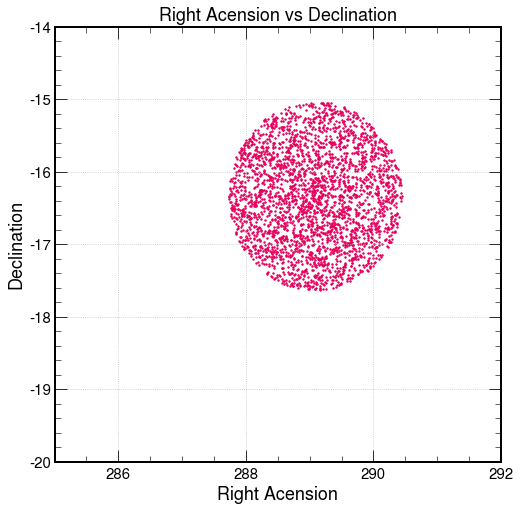

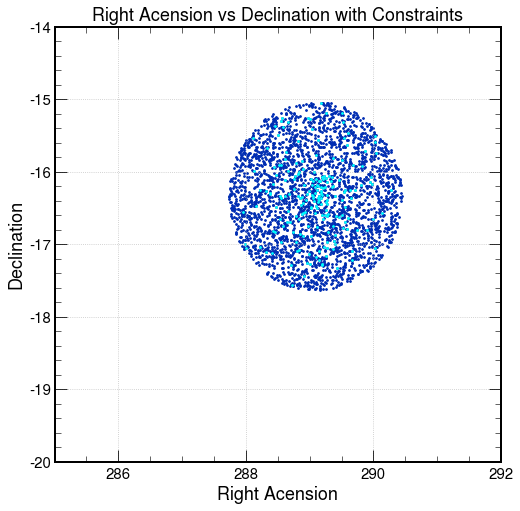

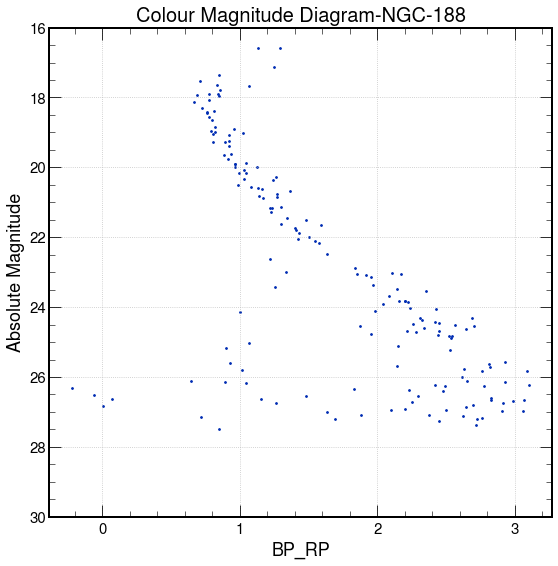

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [132]:
#Filter parallax and plot
query_result3_filtered = query_result3.dropna(subset=['parallax'])
parallax3 = query_result3_filtered['parallax']

parallax_overdensity(parallax3,50,'#cc2900',2,4,0,150,"Parallax [milli arcseconds]","Counts",
                     "Parallax Histogram-Alpha Per",3.35,75,3.2,3.28)


#proper motion
pmra_3 = []
pmdec_3 = []
g_mean_mag3 = []
bp_rp3 = []
parallax_3=[]


for index, row in query_result3_filtered.iterrows():
    if row['parallax'] >= 3.2 and row['parallax'] <= 3.3:
        parallax_3.append(row['parallax'])
        pmra_3.append(row['pmra'])
        pmdec_3.append(row['pmdec'])
        bp_rp3.append(row['bp_rp'])
        g_mean_mag3.append(row['phot_g_mean_mag'])

#proper motion
scatter(7,7,pmra_3,pmdec_3,2,'#00b300',-50,50,-50,30,"Proper motion in Right Acension[mas/year] ",
        "Proper motion in Declination[mas/year] ","NGC 188 - Proper motion in RA vs Proper motion in DEC",-3,1,-29,-24)

#ra dec
ra3 = query_result3['ra']
dec3 = query_result3['dec']

scatterRADEC(8,8,ra3,dec3,2,"#e6005c",285,292,-20,-14,"Right Acension","Declination","Right Acension vs Declination")

ra_3=[]
dec_3=[]

for index, row in query_result3_filtered.iterrows():
    if row['pmra'] >= -3 and row['pmra'] <= 1 and row['pmdec'] >= -29 and row['pmdec'] <= -24:
        ra_3.append(row['ra'])
        dec_3.append(row['dec'])

scatter2(8,8,ra3,dec3,3,"#002db3",ra_3,dec_3,"#00ffff",285,292,-20,-14,"Right Acension","Declination",
         "Right Acension vs Declination with Constraints")

#parallax,g_magnitude,y,s,color,y1,y2,title
cmd(parallax_3,g_mean_mag3,bp_rp3,3,"#002db3",30,16,"Colour Magnitude Diagram-NGC-188",9,9) 


# PRAESEPE

In [135]:
query_result4 = pd.read_csv('Praesepe_5deg.csv')
query_result4

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
0,684882876660198016,134.400467,35.378283,20.676729,6.695894,NaN,NaN,NaN,NaN,21.274860,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
1,684914384540448256,134.123102,32.403005,20.750410,20.036178,NaN,NaN,NaN,NaN,21.309381,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
2,684993407643332736,134.735838,2.538184,21.113545,2.088307,NaN,NaN,NaN,NaN,20.716368,1.971603,NaN,NaN,NOT_AVAILABLE,NaN,NaN
3,684934824291494272,134.336743,15.925623,20.809646,8.821218,NaN,NaN,NaN,NaN,21.163424,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
4,684950629770058112,134.520104,3.106769,21.167224,1.926611,NaN,NaN,NaN,NaN,20.808088,1.091116,NaN,NaN,NOT_AVAILABLE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421639,612481509145431168,135.060852,3.008682,19.231384,2.746299,NaN,NaN,NaN,NaN,20.797080,1.731337,NaN,NaN,NOT_AVAILABLE,NaN,NaN
421640,612257384865929088,134.758385,1.782044,18.225211,0.948088,3.074082,1.328510,-2.852438,-4.257132,20.501303,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
421641,612465188268127488,135.148507,0.382653,19.127004,0.358252,1.456596,0.335754,-13.325522,-5.067614,18.696210,2.186352,NaN,NaN,NOT_AVAILABLE,NaN,NaN
421642,612351251376013312,135.101835,1.418118,18.339425,1.326192,-1.201726,1.592959,-7.625232,-8.922254,20.596777,1.204475,NaN,NaN,NOT_AVAILABLE,NaN,NaN


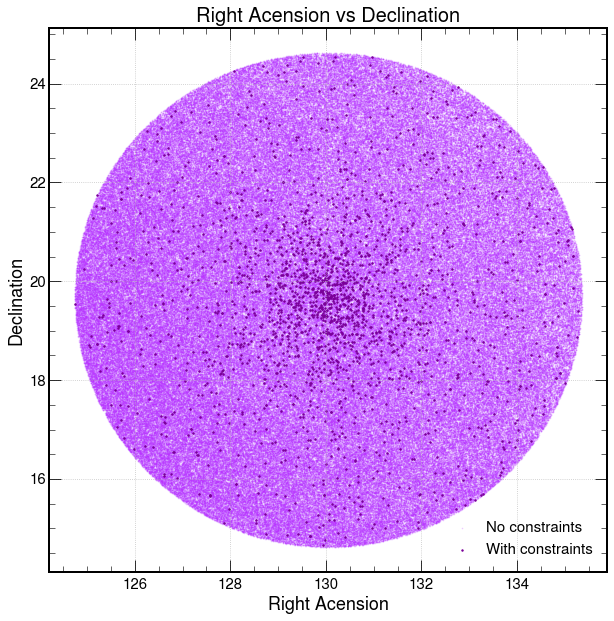

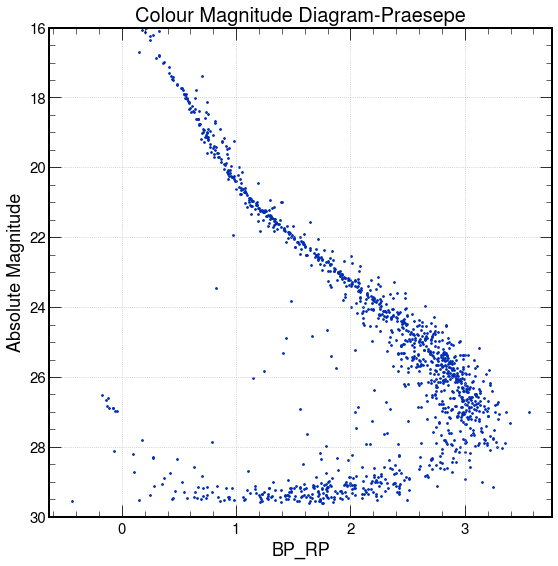

<module 'matplotlib.pyplot' from 'C:\\Users\\aditi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [157]:
#Filter parallax and plot
query_result4_filtered = query_result4.dropna(subset=['parallax'])
parallax4 = query_result4_filtered['parallax']

#parallax_overdensity(parallax4,2000,'#cc2900',3,7,0,2000,"Parallax [milli arcseconds]","Counts",
                     #"Parallax Histogram-Praesepe",5.07,700,5.1,5.45)


#proper motion
pmra_4 = []
pmdec_4 = []
g_mean_mag4 = []
bp_rp4 = []
parallax_4=[]


for index, row in query_result4_filtered.iterrows():
    if row['parallax'] >= 5.1 and row['parallax'] <= 5.4:
        parallax_4.append(row['parallax'])
        pmra_4.append(row['pmra'])
        pmdec_4.append(row['pmdec'])
        bp_rp4.append(row['bp_rp'])
        g_mean_mag4.append(row['phot_g_mean_mag'])

#proper motion
#scatter(7,7,pmra_4,pmdec_4,2,'#00b300',-100,100,-150,100,"Proper motion in Right Acension[mas/year] ",
        #"Proper motion in Declination[mas/year] ","NGC 188 - Proper motion in RA vs Proper motion in DEC",-43,-30,-20,-6)


#ra dec
ra4 = query_result4['ra']
dec4 = query_result4['dec']

ra_4=[]
dec_4=[]

for index, row in query_result4_filtered.iterrows():
    if row['pmra'] >= -43 and row['pmra'] <= -30 and row['pmdec'] >= -20 and row['pmdec'] <= -6:
        ra_4.append(row['ra'])
        dec_4.append(row['dec'])

plt.scatter(ra4, dec4, color='#bb33ff', s=0.5, alpha=0.2, label='No constraints')
plt.scatter(ra_4, dec_4, s=2, color='#7a0099', label='With constraints')
plt.xlabel("Right Acension", fontsize=18, loc="center")
plt.ylabel("Declination", fontsize=18, loc="center")
plt.title("Right Acension vs Declination", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right',prop={'size': 15})
plt.grid()
plt.show()



#parallax,g_magnitude,y,s,color,y1,y2,title
cmd(parallax_4,g_mean_mag4,bp_rp4,3,"#002db3",30,16,"Colour Magnitude Diagram-Praesepe",9,9) 
